1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [14]:
# Generate the dataset
import numpy as np 

n = 1000

# x1 = N(0,1)
x1 = np.random.normal(0,1,n)

# x2 = N(0,3) + x1 
x2 = x1 + np.random.normal(0,3,n)

# x3 = 2*x1 + x2
x3 = 2*x1 + x2

X = np.array([x1,x2,x3])

In [15]:
# find the eigenvectors and eigenvalues of the covariance matrix
l, V = np.linalg.eig(np.cov(X))

print("Eigenvalues:",l)
print("Eigenvectors:\n",V)

Eigenvalues: [2.67681042e+01 5.91562523e-16 2.01973214e+00]
Eigenvectors:
 [[-0.11367612 -0.81649658  0.56604865]
 [-0.57958906 -0.40824829 -0.7052729 ]
 [-0.8069413   0.40824829  0.4268244 ]]


In [16]:
# Find the eigenvectors and eigenvalues using SVD
U, S, Vt = np.linalg.svd(X-X.mean(1)[:,np.newaxis])
print("Eigenvalue found with SVD:",S**2/(n-1))
print("Eigenvectors found with SVD:\n",U)

Eigenvalue found with SVD: [2.67681042e+01 2.01973214e+00 5.12998580e-31]
Eigenvectors found with SVD:
 [[-0.11367612  0.56604865 -0.81649658]
 [-0.57958906 -0.7052729  -0.40824829]
 [-0.8069413   0.4268244   0.40824829]]


In [17]:
# What percent of the total variability is explained by the principal components?
l = S**2/(n-1)  
V = U

print("Eigenvalues:",l)
trace = np.cov(X).trace()
print("Trace of cov(X):",trace)

# explained variability
explaineVariability = []
for li in l:
    explaineVariability.append(li/trace)
    
print("Explained variability:",explaineVariability)   

Eigenvalues: [2.67681042e+01 2.01973214e+00 5.12998580e-31]
Trace of cov(X): 28.787836324934815
Explained variability: [0.9298407801733837, 0.0701592198266169, 1.7819976956580023e-32]


Scree-plot: plot $\nu_i$ against $i$ and see when the plot has "flattened out"
$$\nu_i = \frac{\lambda_1 + \dots + \lambda_i}{\lambda_1 + \dots + \lambda_p}$$

<IPython.core.display.Javascript object>


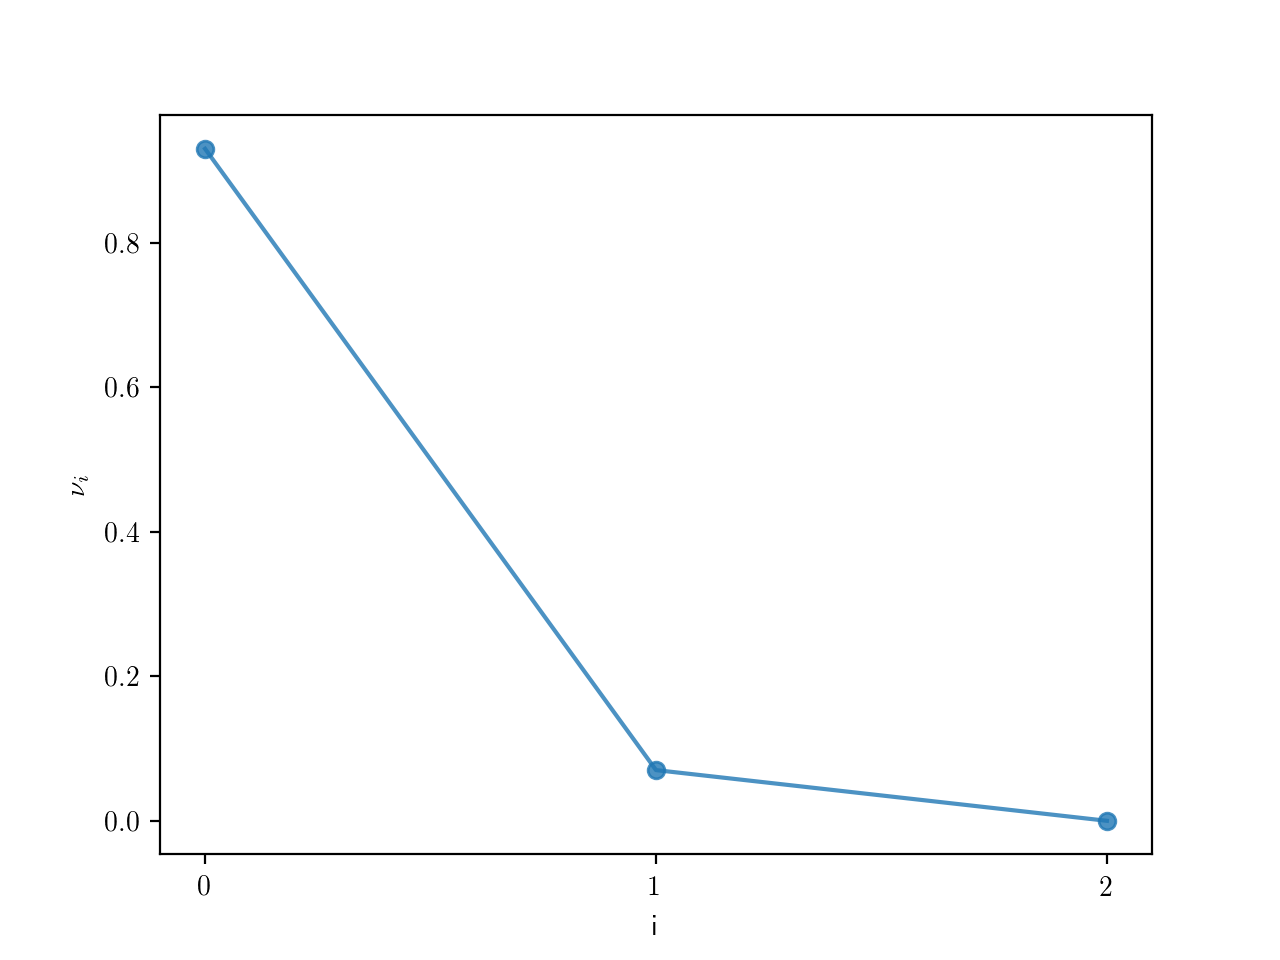

In [18]:
## scree-plot
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
%matplotlib notebook

plt.figure()
plt.plot(range(len(explaineVariability)), explaineVariability, "-o", alpha=0.8)
plt.xticks(range(len(explaineVariability)))
plt.xlabel(r"i")
plt.ylabel(r"$\nu_{i}$")
plt.show()

<IPython.core.display.Javascript object>


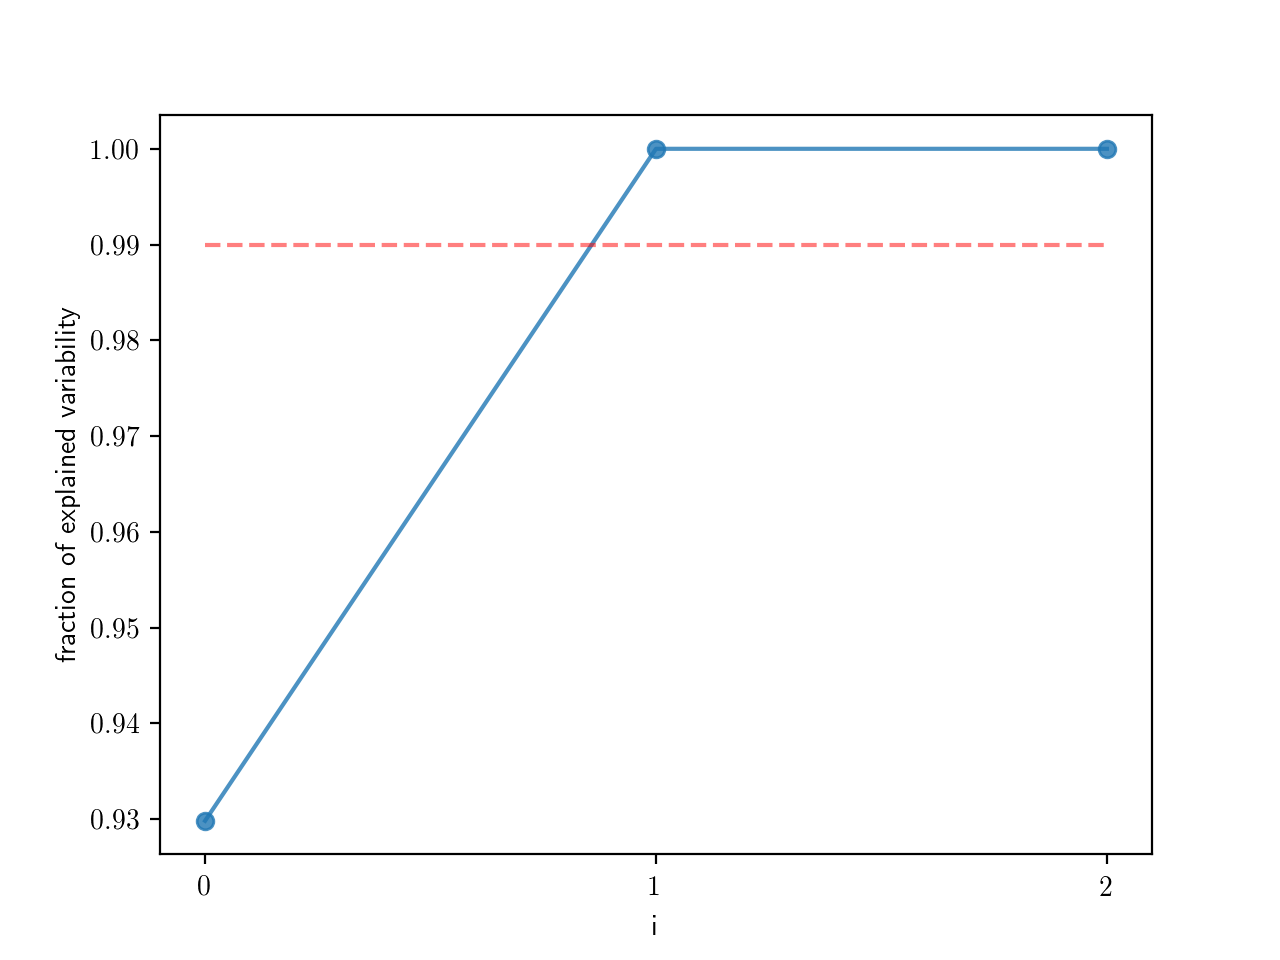

In [21]:
# Almost 100% of the variability is explained by the first two Principal Components
plt.figure()
plt.plot(range(len(explaineVariability)), np.cumsum(explaineVariability),'-o', alpha=0.8)
plt.plot([0,2], [0.99,0.99], '--', color='red', alpha=0.5)
plt.xticks(range(len(explaineVariability)))
plt.xlabel(r"i")
plt.ylabel(r"fraction of explained variability")
plt.show()

<IPython.core.display.Javascript object>


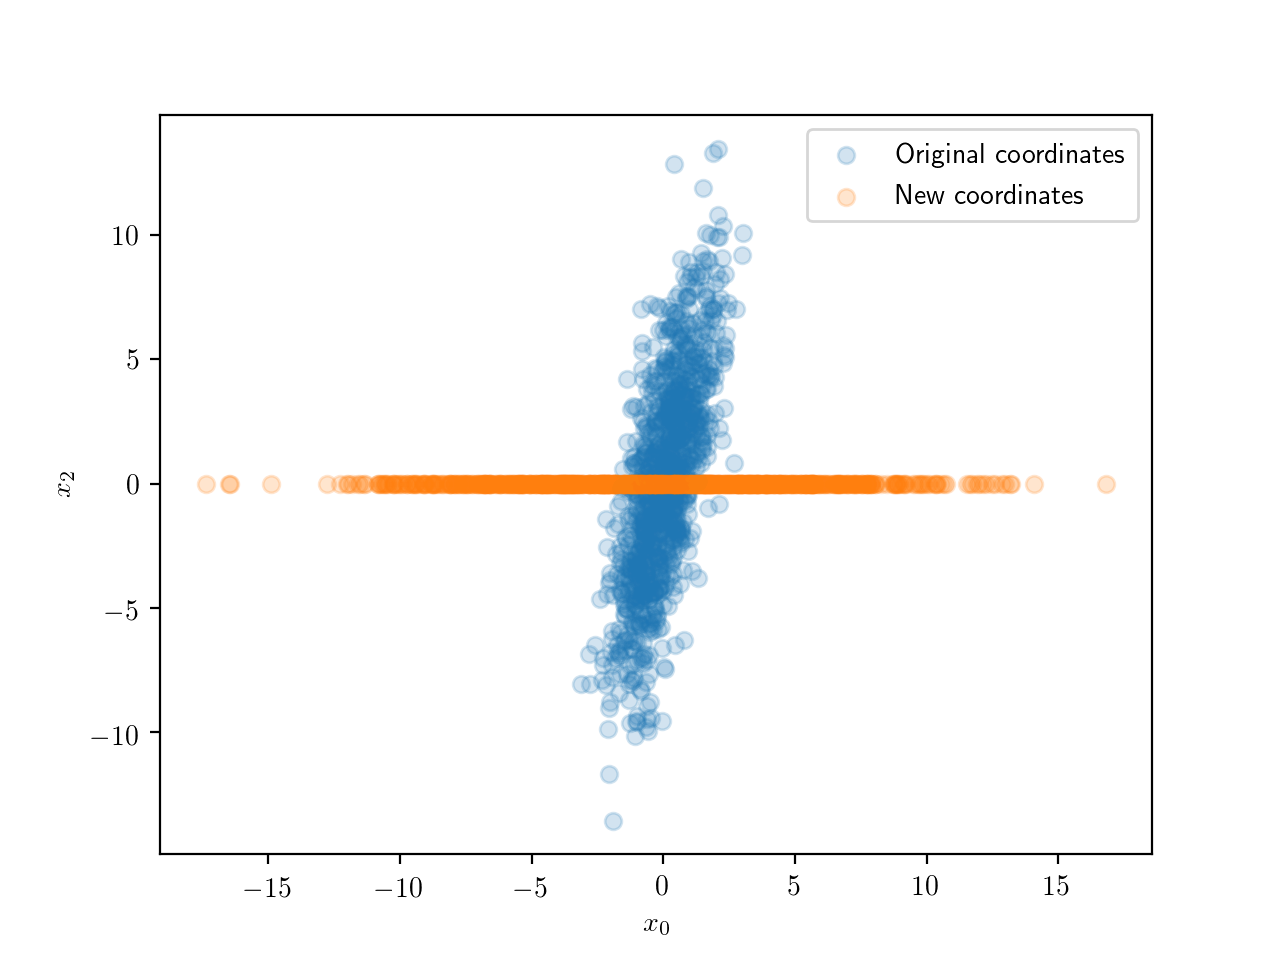

In [22]:
# Redefine the data in the basis yielded by the PCA procedure
# We can do this by rotating all the points 
Xp = np.dot(V.T, X)

# Plot the data points in the original and the new coordiantes as a set of scatter plots.
# Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

plt.figure()
plt.scatter(X[0,:], X[2,:], alpha=0.2, label="Original coordinates")
plt.scatter(Xp[0,:], Xp[2,:], alpha=0.2, label="New coordinates")
plt.legend()
plt.xlabel("$x_{0}$")
plt.ylabel("$x_{2}$")
plt.show()

<IPython.core.display.Javascript object>


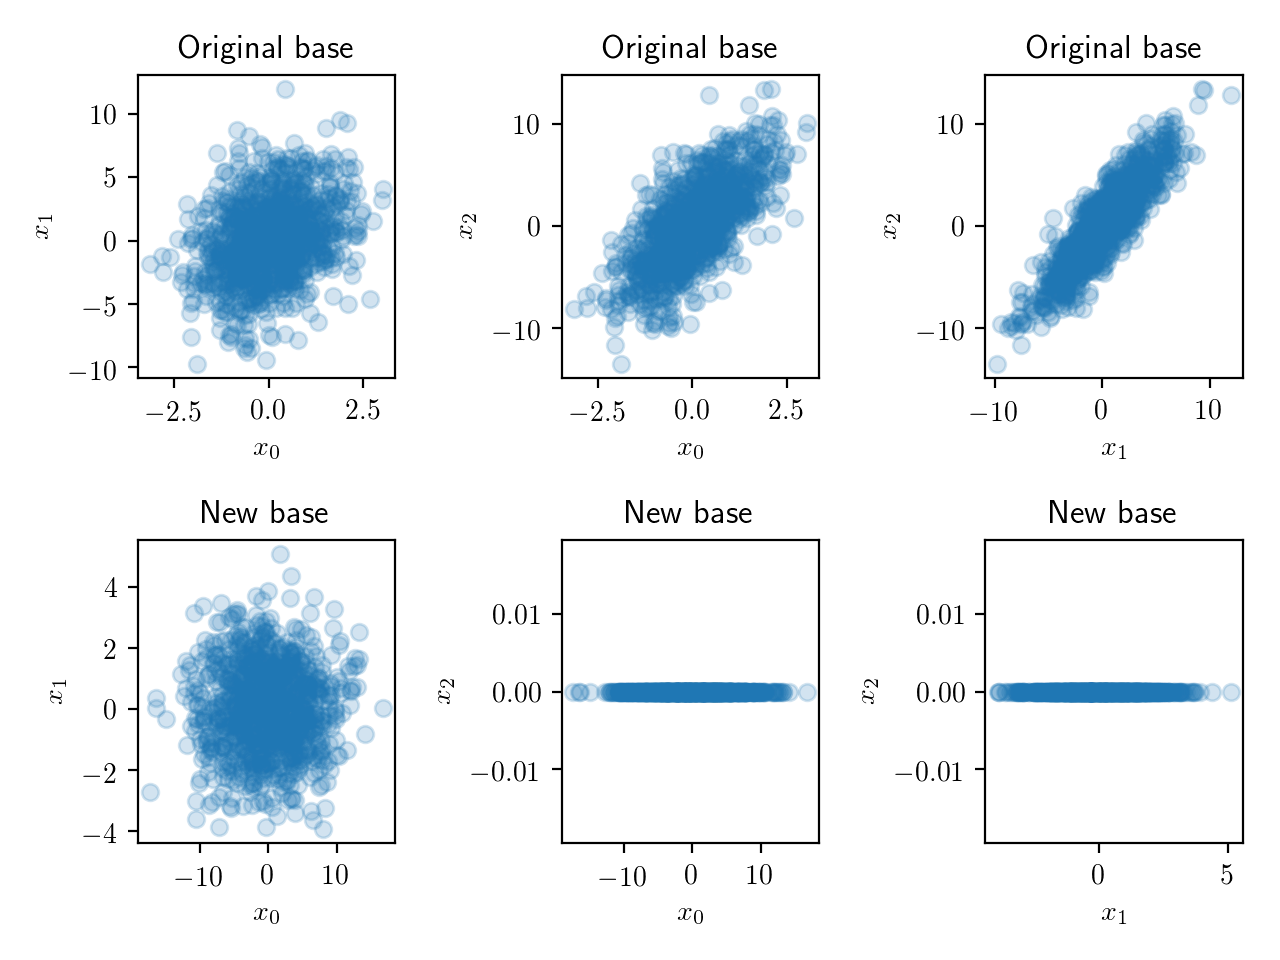

In [23]:
from itertools import combinations

fig, axes = plt.subplots(2,3)

for col,(v1,v2) in enumerate(combinations([0,1,2], 2)):
    axes[0, col].scatter(X[v1,:], X[v2,:], alpha=0.2)
    axes[0, col].set_xlabel("$x_{}$".format(v1))
    axes[0, col].set_ylabel("$x_{}$".format(v2))
    axes[0, col].set_title("Original base")
    
for col,(v1,v2) in enumerate(combinations([0,1,2], 2)):
    axes[1, col].scatter(Xp[v1,:], Xp[v2,:], alpha=0.2)
    axes[1, col].set_xlabel("$x_{}$".format(v1))
    axes[1, col].set_ylabel("$x_{}$".format(v2))
    axes[1, col].set_title("New base")
    
plt.tight_layout()
fig.show()

<IPython.core.display.Javascript object>


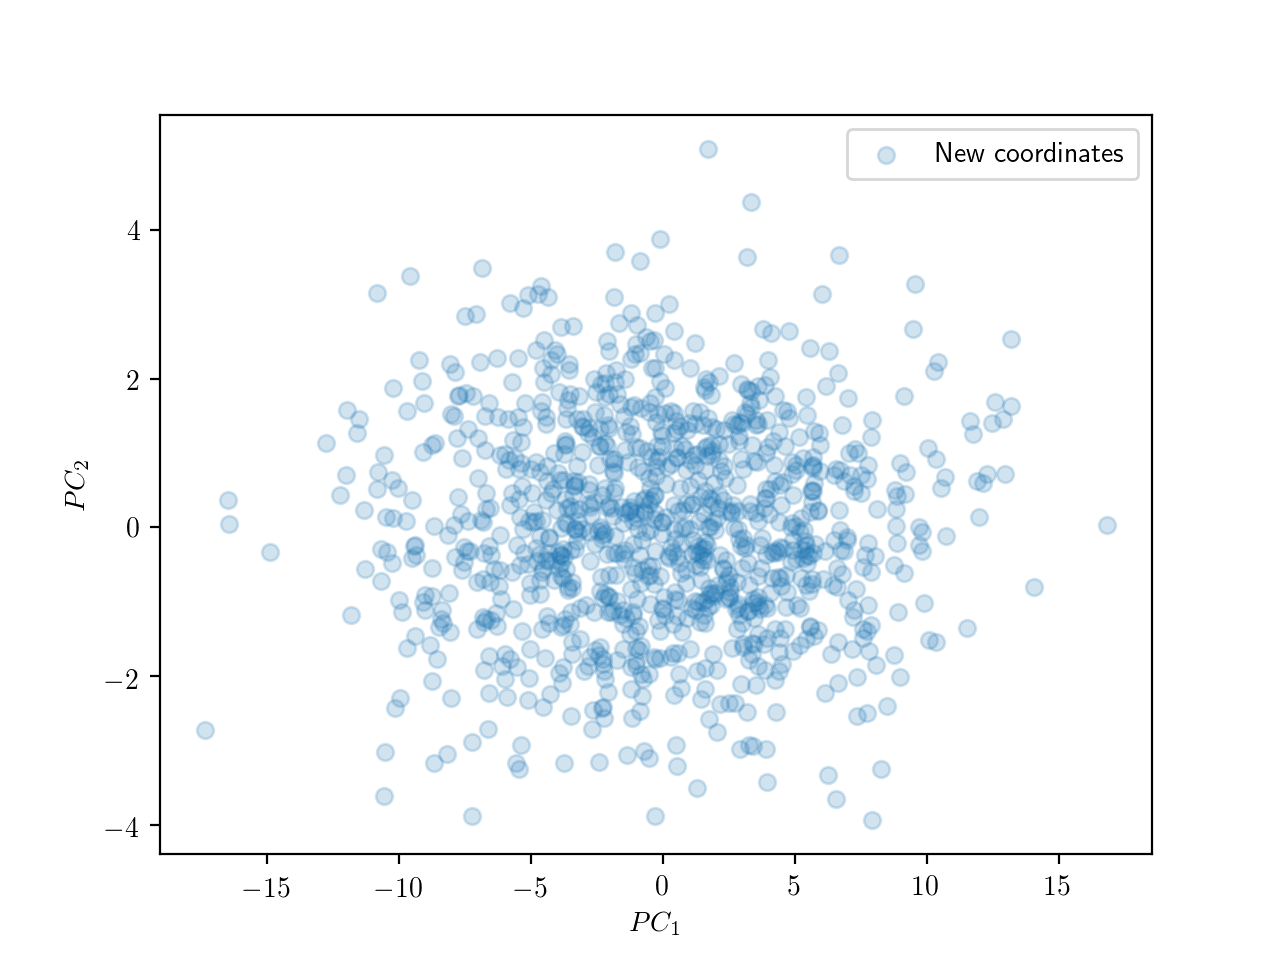

In [24]:
## If we consider only the first two principal component we are able to explain 99% of the total variabiliry
## and thus reduce the dimensionality from 3 to 2 
Xp_reduced = np.dot(V[:,:2].T, X)

plt.figure()
plt.scatter(Xp_reduced[0,:], Xp_reduced[1,:], alpha=0.2, label="New coordinates")
plt.legend()
plt.xlabel("$PC_{1}$")
plt.ylabel("$PC_{2}$")
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [25]:
sd = np.arange(0.02,0.08,0.06/10)

In [26]:
Xnoise = np.zeros((13,1000), dtype="float")

Xnoise[:3,:] = X

# Add 10 rv's representing noise 
for i in range(3,13):
    Xnoise[i] = np.random.normal(0,sd[i-3],size=n)

In [27]:
# find the eigenvectors and eigenvalues of the covariance matrix
l, V = np.linalg.eig(np.cov(Xnoise))

print("Eigenvalues:\n",l)
#print("Eigenvectors:\n",V)

Eigenvalues:
 [ 2.67681237e+01  2.01974754e+00  5.39169929e-03  4.72406100e-03
  3.71420909e-03  3.19090586e-03  2.55336160e-03 -1.67675721e-15
  1.86335853e-03  1.43702886e-03  1.02186547e-03  6.14976012e-04
  4.33712171e-04]


In [28]:
# Find the eigenvectors and eigenvalues using SVD
U, S, Vt = np.linalg.svd(Xnoise-Xnoise.mean(1)[:,np.newaxis])
print("Eigenvalue found with SVD:\n",S**2/(n-1))
#print("Eigenvectors found with SVD:\n",U)

Eigenvalue found with SVD:
 [2.67681237e+01 2.01974754e+00 5.39169929e-03 4.72406100e-03
 3.71420909e-03 3.19090586e-03 2.55336160e-03 1.86335853e-03
 1.43702886e-03 1.02186547e-03 6.14976012e-04 4.33712171e-04
 5.05251526e-31]


In [29]:
l = S**2/(n-1)  
V = U

trace = np.cov(X).trace()
print("Trace of cov(X):",trace)

# explained variability
explaineVariability = []
for li in l:
    explaineVariability.append(li/trace)
    
print("Explained variability:\n",explaineVariability)

Trace of cov(X): 28.787836324934815
Explained variability:
 [0.9298414579580945, 0.07015975486945532, 0.0001872908832921421, 0.00016409920296121155, 0.00012902008499258524, 0.00011084215638507192, 8.869584955637596e-05, 6.4727286658645e-05, 4.991791834253384e-05, 3.549643184523068e-05, 2.1362356148536972e-05, 1.5065813421211525e-05, 1.7550868376668525e-32]


<IPython.core.display.Javascript object>


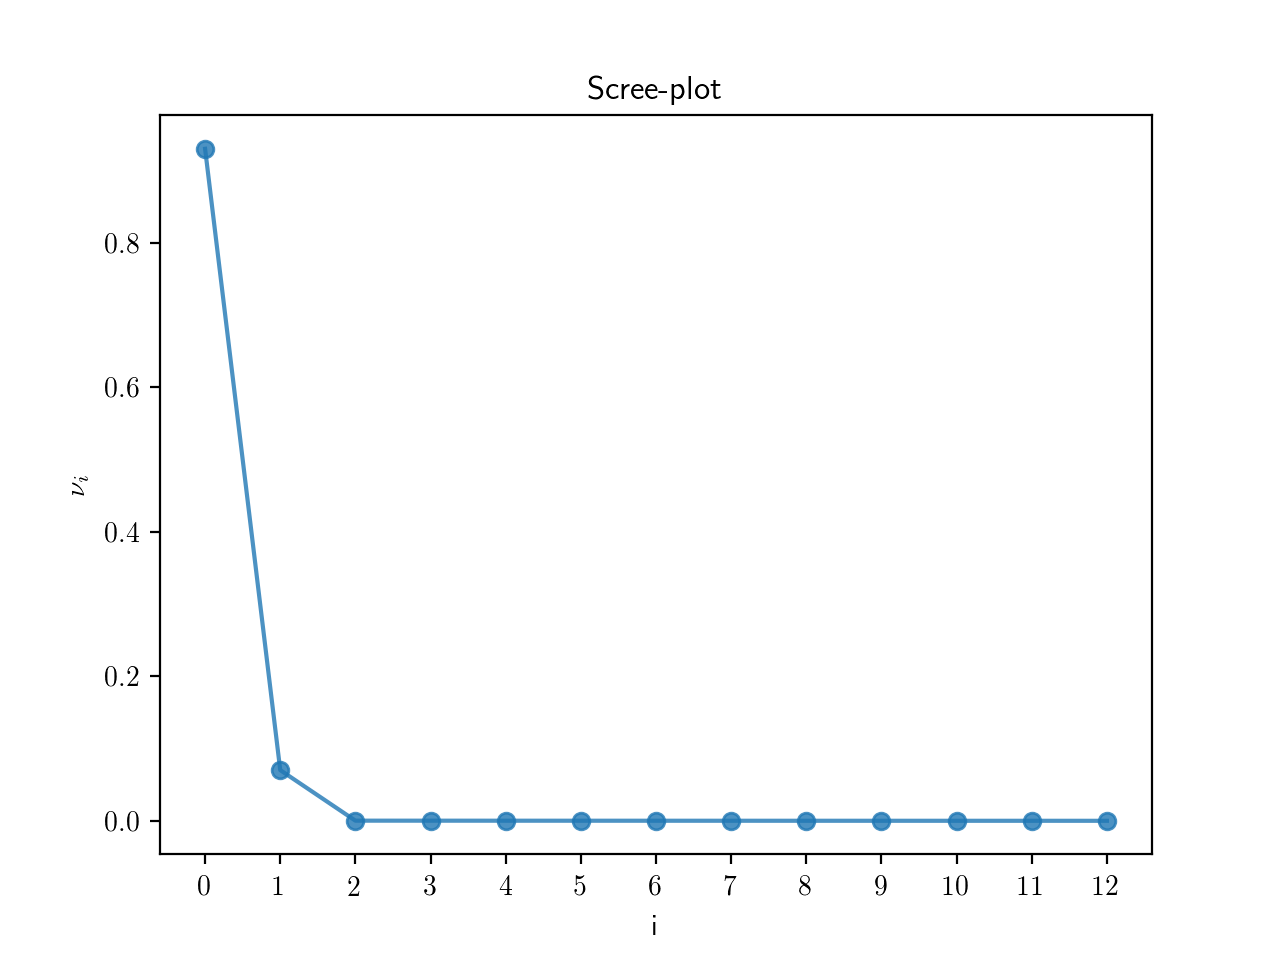

In [30]:
plt.figure()
plt.plot(range(len(explaineVariability)), explaineVariability, "-o", alpha=0.8)
plt.xticks(range(len(explaineVariability)))
plt.title("Scree-plot")
plt.xlabel(r"i")
plt.ylabel(r"$\nu_{i}$")
plt.show()

<IPython.core.display.Javascript object>


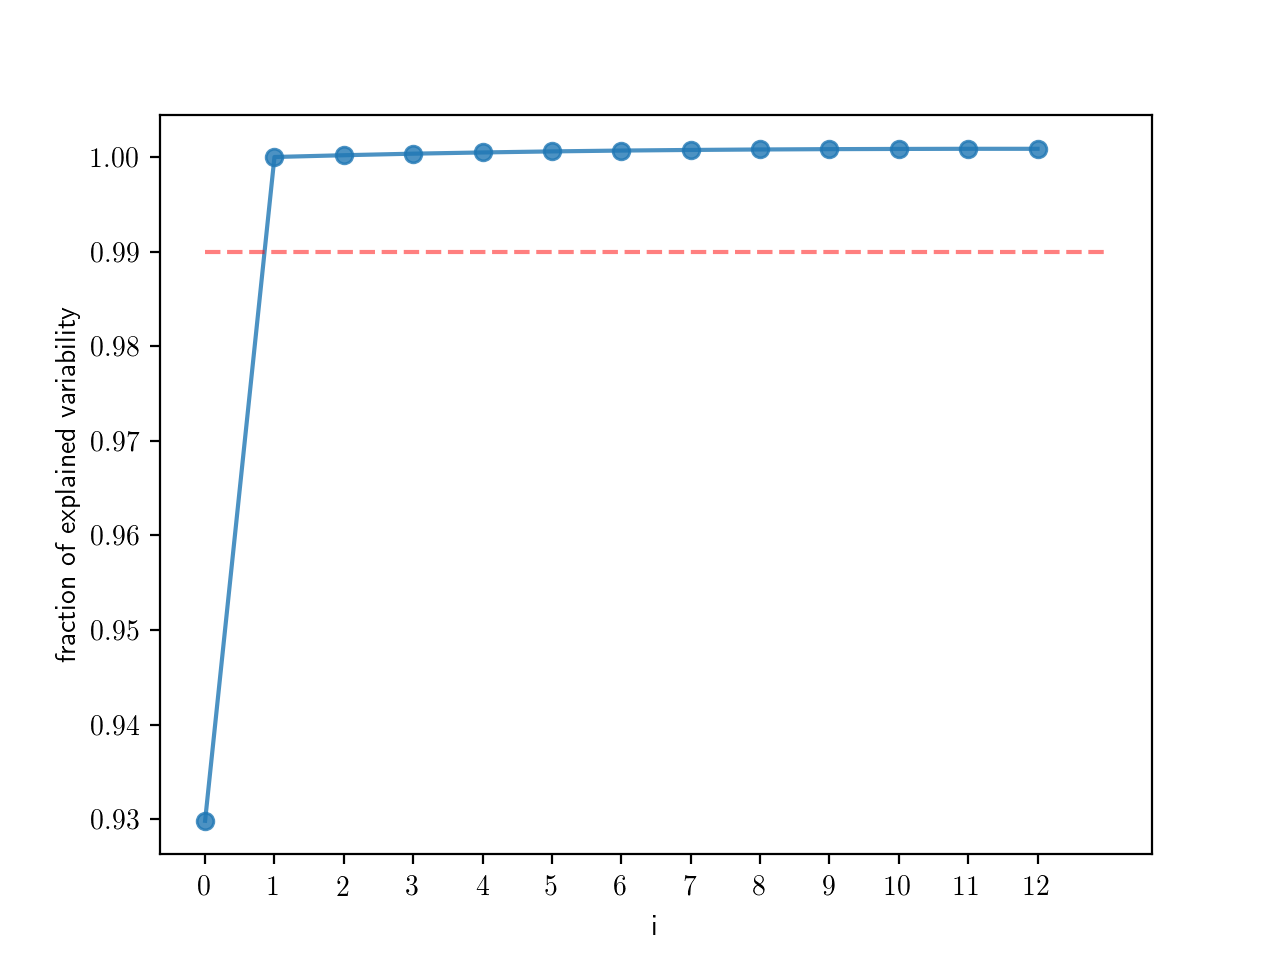

In [31]:
plt.figure()
plt.plot(range(len(explaineVariability)), np.cumsum(explaineVariability),'-o', alpha=0.8)
plt.plot([0,len(explaineVariability)], [0.99,0.99], '--', color='red', alpha=0.5)
plt.xticks(range(len(explaineVariability)))
plt.xlabel(r"i")
plt.ylabel(r"fraction of explained variability")
plt.show()

From these two plots we can see that all the variability is explained by the first three component, as we expected!

<IPython.core.display.Javascript object>


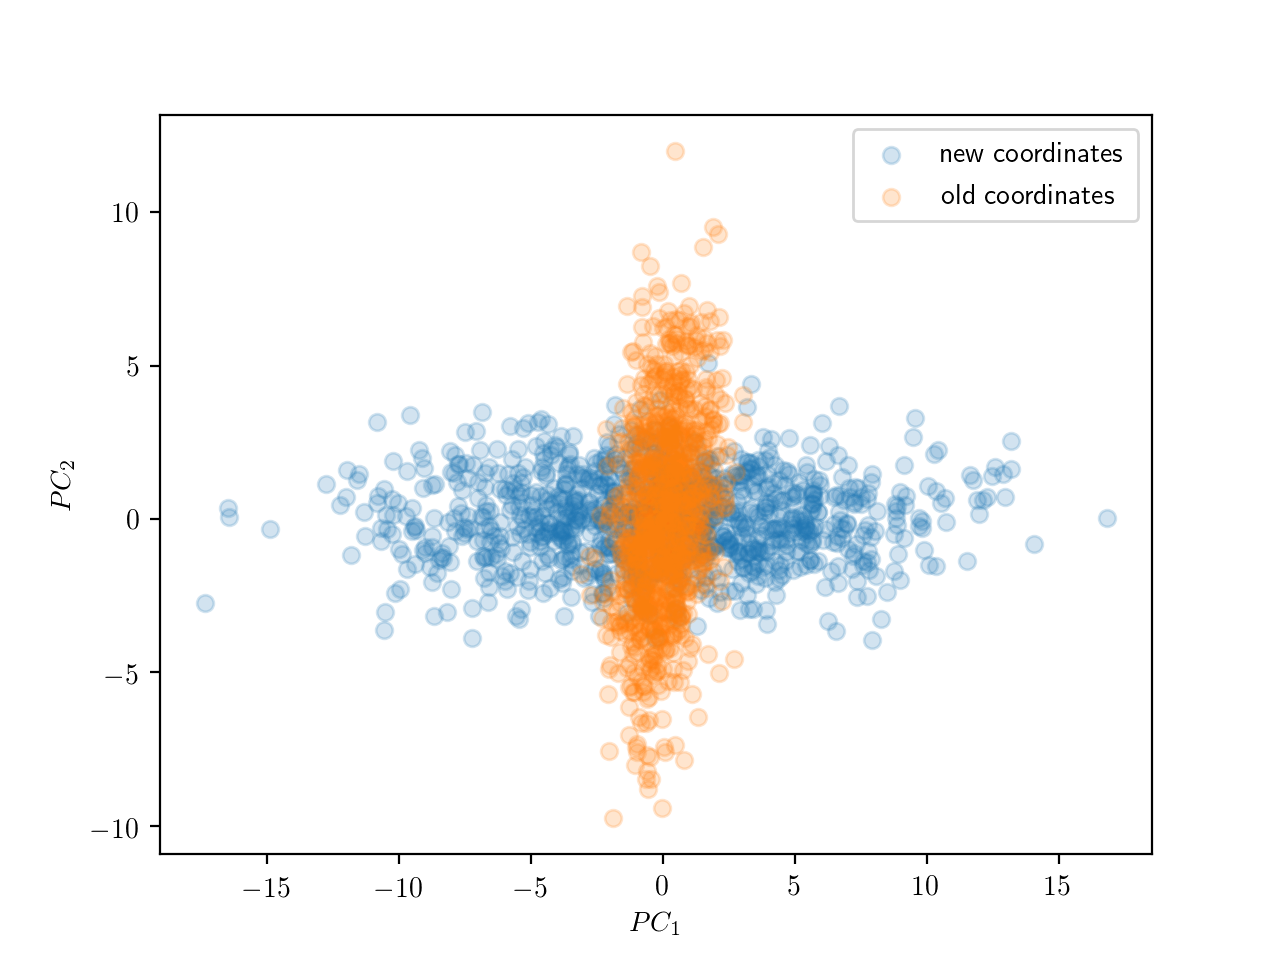

In [33]:
Xp_reduced = np.dot(V[:,:3].T, Xnoise)

plt.figure()
plt.scatter(Xp_reduced[0,:], Xp_reduced[1,:], alpha=0.2, label="new coordinates")
plt.scatter(Xnoise[0,:], Xnoise[1,:], alpha=0.2, label="old coordinates")
plt.legend()
plt.xlabel("$PC_{1}$")
plt.ylabel("$PC_{2}$")
plt.show()

<IPython.core.display.Javascript object>


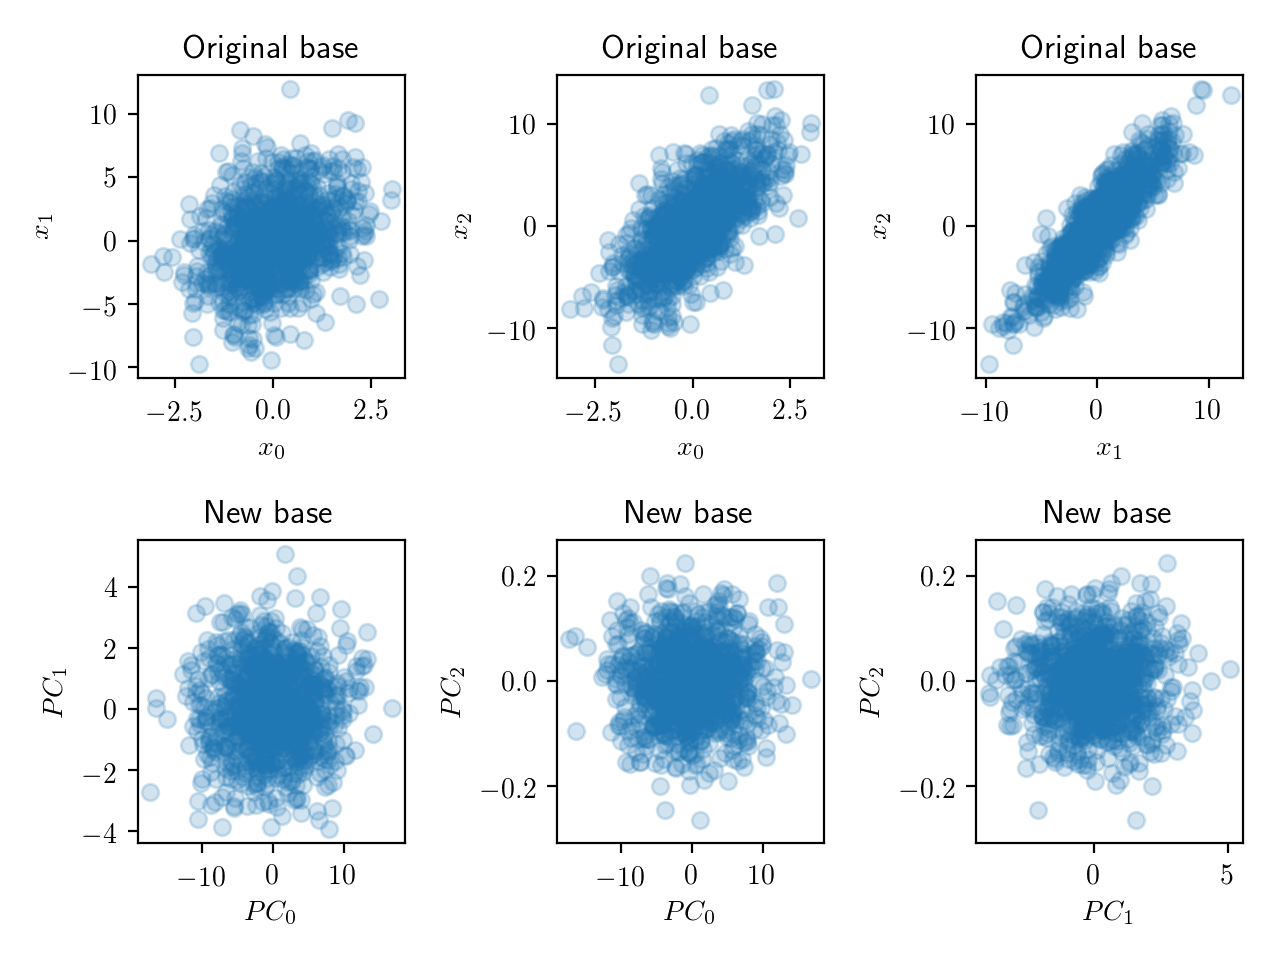

In [34]:
fig, axes = plt.subplots(2,3)

Xp_reduced = np.dot(V[:,:3].T, Xnoise)

for col,(v1,v2) in enumerate(combinations([0,1,2], 2)):
    axes[0, col].scatter(Xnoise[v1,:], Xnoise[v2,:], alpha=0.2)
    axes[0, col].set_xlabel("$x_{}$".format(v1))
    axes[0, col].set_ylabel("$x_{}$".format(v2))
    axes[0, col].set_title("Original base")
    
for col,(v1,v2) in enumerate(combinations([0,1,2], 2)):
    axes[1, col].scatter(Xp_reduced[v1,:], Xp_reduced[v2,:], alpha=0.2)
    axes[1, col].set_xlabel("$PC_{}$".format(v1))
    axes[1, col].set_ylabel("$PC_{}$".format(v2))
    axes[1, col].set_title("New base")
    
plt.tight_layout()
fig.show()

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [59]:
import pandas as pd
df = pd.read_csv("magic04.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [60]:
df.shape

(19020, 11)

In [61]:
# the last column represent either signal (gamma=g) or background (hadron=h)
# let's select the signal events

signal = df.loc[df[10]=='g',:9]
signal.shape

(12332, 10)

In [62]:
## get the covariance matrix
cov = signal.cov()

# find the eigenvectors and eigenvalues of the covariance matrix
l, V = np.linalg.eig(cov)

print("Eigenvalues:\n",l)

Eigenvalues:
 [5.53585185e+03 1.68762472e+03 9.89519286e+02 3.79447675e+02
 2.62426537e+02 1.83690249e+02 3.86358142e+01 4.25672089e-02
 9.16817511e-03 3.13024820e-04]


In [63]:
trace = l.sum()
print("Trace of cov(X):",trace)

# explained variability
explaineVariability = []
for li in l:
    explaineVariability.append(li/trace)
    
print("Explained variability:\n",explaineVariability)

Trace of cov(X): 9077.248176767354
Explained variability:
 [0.6098601408670532, 0.1859180978800835, 0.10901093229714999, 0.041802060223533936, 0.02891036270349628, 0.02023633652358575, 0.004256335563724639, 4.689439806832809e-06, 1.010017015655923e-06, 3.4484550168181e-08]


<IPython.core.display.Javascript object>


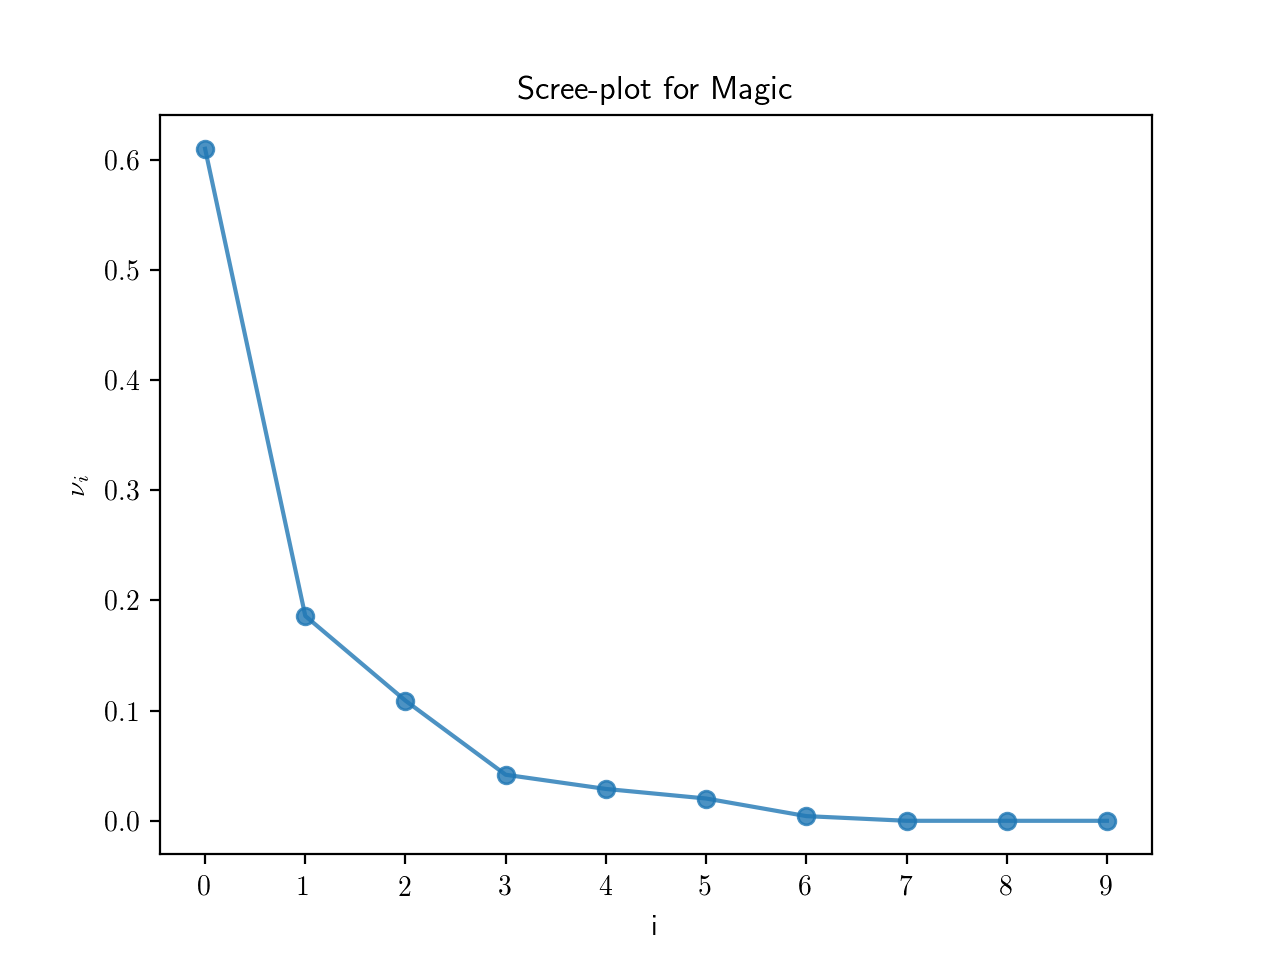

In [64]:
plt.figure()
plt.plot(range(len(explaineVariability)), explaineVariability, "-o", alpha=0.8)
plt.xticks(range(len(explaineVariability)))
plt.title("Scree-plot for Magic")
plt.xlabel(r"i")
plt.ylabel(r"$\nu_{i}$")
plt.show()

<IPython.core.display.Javascript object>


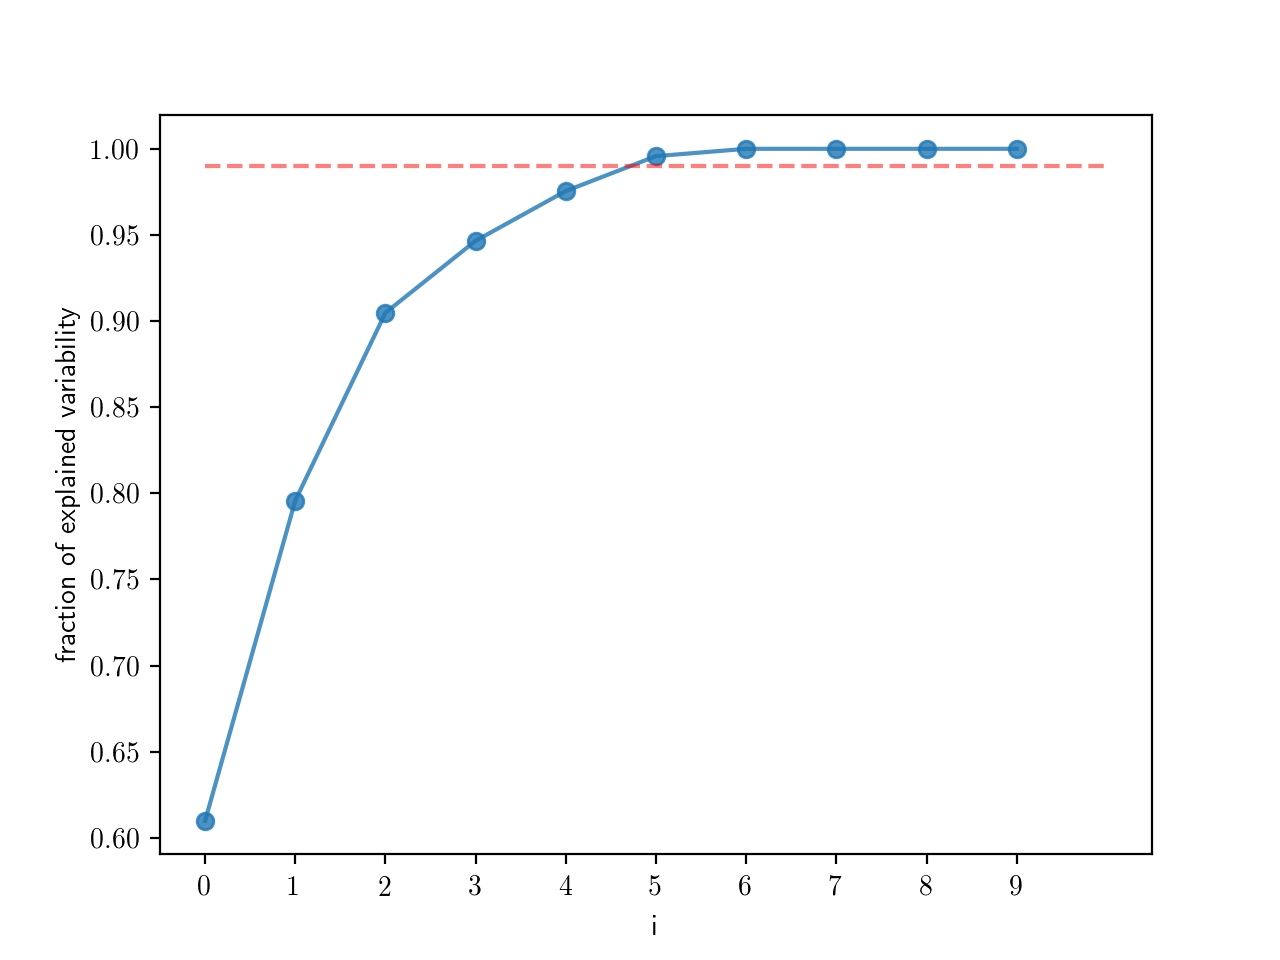

In [65]:
plt.figure()
plt.plot(range(len(explaineVariability)), np.cumsum(explaineVariability),'-o', alpha=0.8)
plt.plot([0,len(explaineVariability)], [0.99,0.99], '--', color='red', alpha=0.5)
plt.xticks(range(len(explaineVariability)))
plt.xlabel(r"i")
plt.ylabel(r"fraction of explained variability")
plt.show()

We can explain almost $98\%$ of the total variability with the first five principal components.

<IPython.core.display.Javascript object>


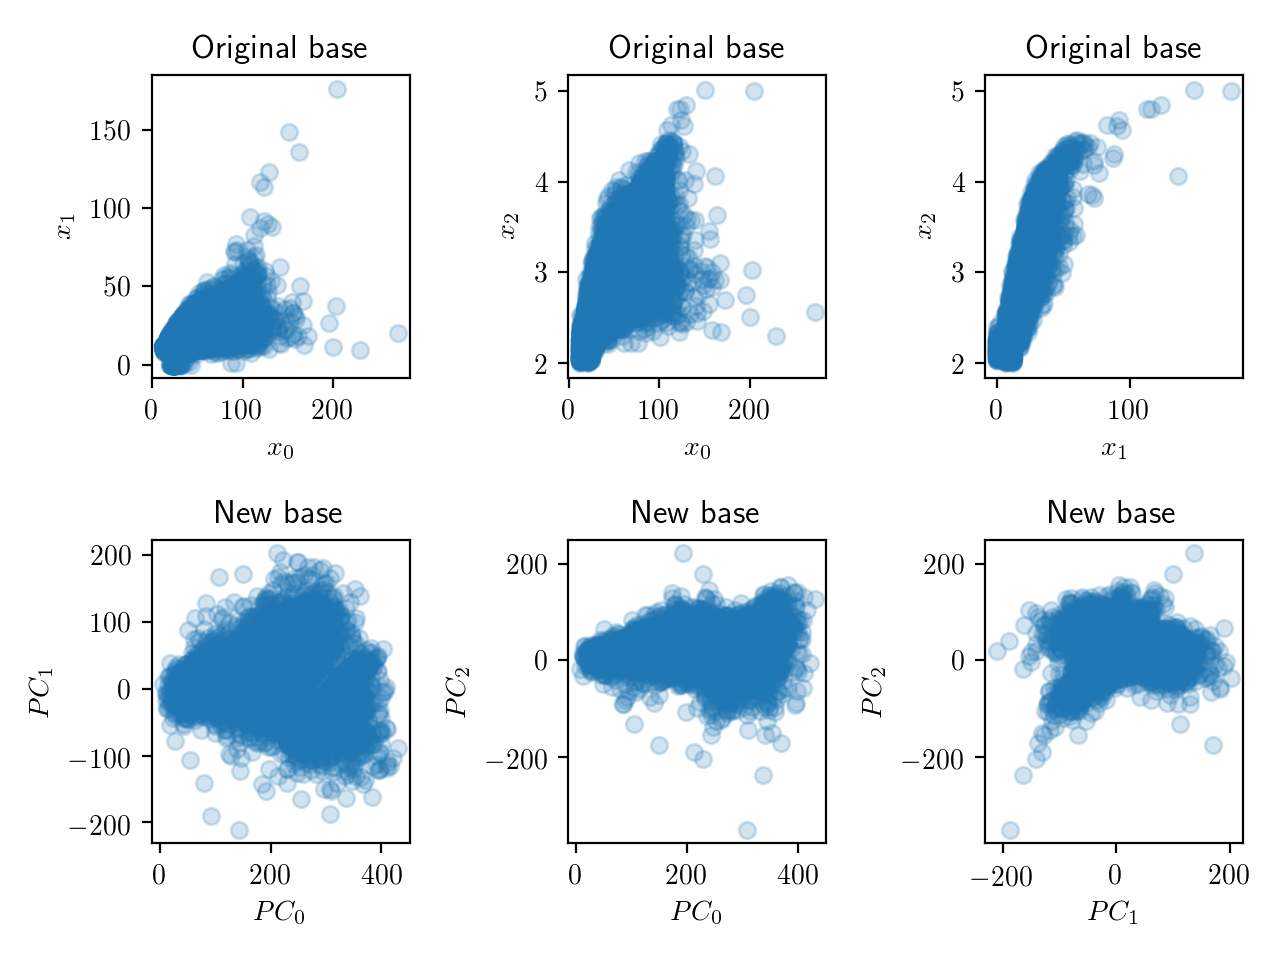

In [85]:
fig, axes = plt.subplots(2,3)

Xp_reduced = np.dot(V[:,:5].T, signal.values.T)

for col,(v1,v2) in enumerate(combinations([0,1,2], 2)):
    axes[0, col].scatter(signal.values.T[v1,:], signal.values.T[v2,:], alpha=0.2)
    axes[0, col].set_xlabel("$x_{}$".format(v1))
    axes[0, col].set_ylabel("$x_{}$".format(v2))
    axes[0, col].set_title("Original base")
    
for col,(v1,v2) in enumerate(combinations([0,1,2], 2)):
    axes[1, col].scatter(Xp_reduced[v1,:], Xp_reduced[v2,:], alpha=0.2)
    axes[1, col].set_xlabel("$PC_{}$".format(v1))
    axes[1, col].set_ylabel("$PC_{}$".format(v2))
    axes[1, col].set_title("New base")
    
plt.tight_layout()
fig.show()